# 1. Знакомимся с данными

✍ Вы уже умеете делать запросы к одной таблице, использовать агрегатные функции и фильтровать данные в выводе. Но в реальных условиях базы данных обычно содержат множество таблиц и при запросе необходимо обращаться к нескольким таблицам. Освоением этого навыка мы сейчас и займёмся ↓

→ Первым делом — знакомимся с датасетом.

В этом модуле мы будем работать с таблицами о футбольных матчах и командах.

Таблицы этого модуля, как и все другие в курсе, лежат в схеме sql в Metabase. Нам понадобятся таблицы teams и matches.

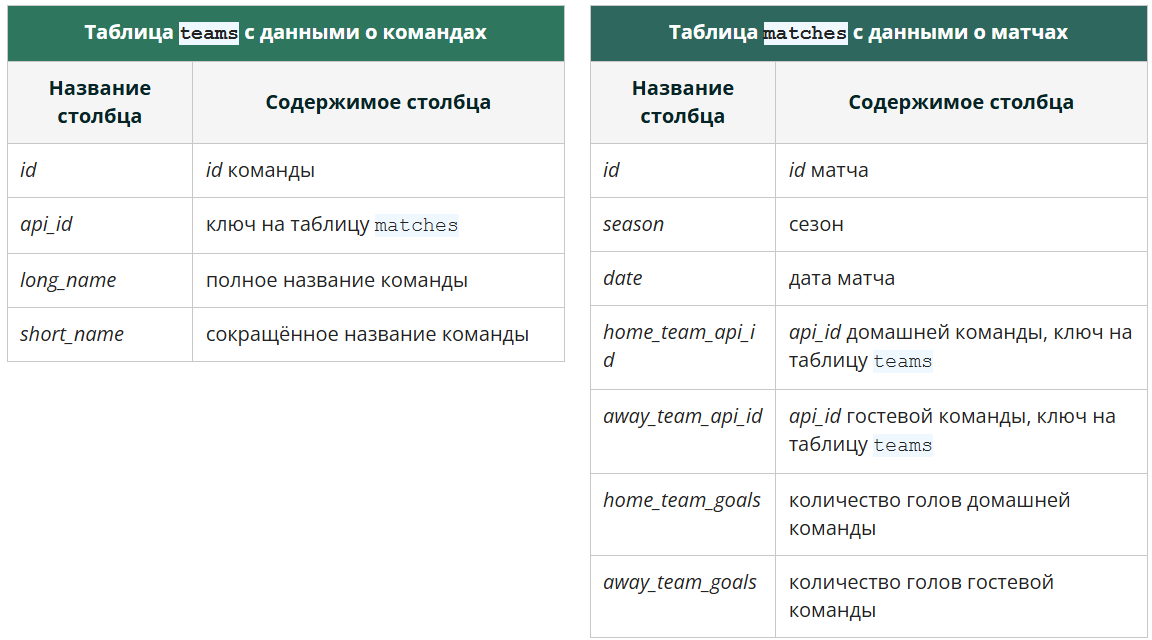

Примечание. Как и в предыдущих модулях, вы можете посмотреть подробный разбор структуры предлагаемых запросов во вкладке Детализация.

→ Сколько различных полных названий команд в таблице teams?

In [ ]:
select
count(distinct long_name)
FROM sql.teams

→ Сколько в таблице teams команд с коротким названием VAL?

In [ ]:
select
count(short_name)
FROM sql.teams
WHERE short_name = 'VAL'

→ Информацию о скольких матчах содержит таблица matches?

In [ ]:
select
count(distinct id)
FROM sql.matches

→ Данные за какие сезоны даны в таблице matches?

In [ ]:
select
distinct season
FROM sql.matches

Напишите запрос, который выведет сезон (season), а также общее количество забитых мячей домашними (total_home_goals) и гостевыми (total_away_goals) командами.

Отсортируйте по столбцу с сезоном в порядке возрастания.

In [ ]:
select
    season,
    SUM(home_team_goals) as total_home_goals,
    SUM(away_team_goals) as total_away_goals
FROM sql.matches
group by season
order by season

# 2. Соединение таблиц по ключу

### Объединяем таблицы без операторов

✍ Существует несколько способов соединения таблиц. Мы познакомимся со всеми основными операторами, которые используются для этих нужд, но начнём с простого метода объединения таблиц — без операторов.

Чтобы соединить две таблицы между собой, достаточно записать названия таблиц через запятую в разделе from. Что произойдёт в таком случае?

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches

In [ ]:
SELECT * /*выбор всех полей*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/

Каждая запись, которая есть в таблице teams, будет соединена с каждой записью в таблице matches.

Это действие также называют декартовым произведением таблиц.

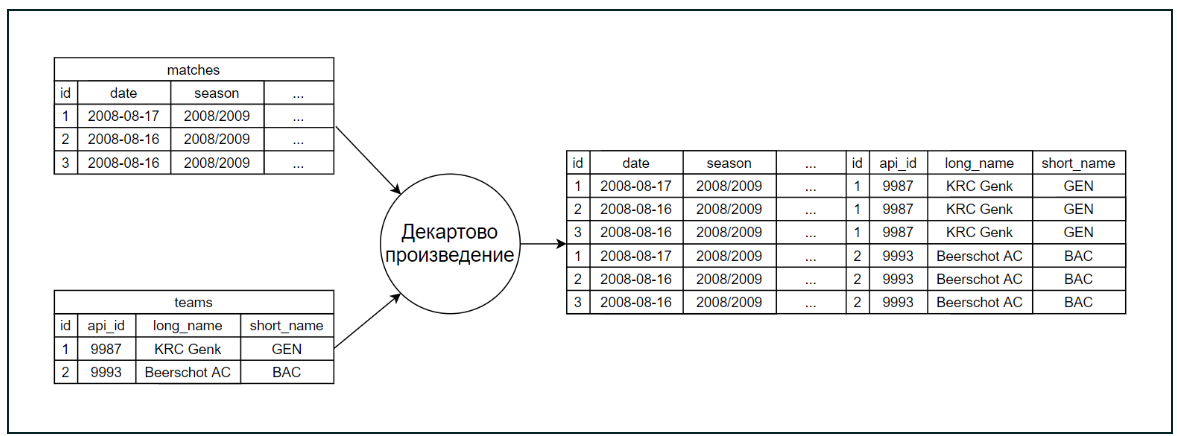

Действительно ли это произведение?

Легко проверить! В исходных таблицах teams и matches было 299 и 25083 записей соответственно. Если соединить каждую запись одной таблицы с каждой записью другой, получится 299 * 25083 записей в итоговой таблице.

Напишите запрос, который выведет количество строк соединённой таблицы.

In [ ]:
SELECT COUNT(*)
FROM sql.teams, sql.matches

В данном случае соединение таблиц не даёт практической пользы: мы получили очень много записей, которые никак не можем интерпретировать, потому что команды не соответствуют матчам.

Давайте исправим это. В таблице teams есть столбец api_id, а таблица matches содержит столбцы home_team_api_id и away_team_api_id — это ключи таблиц, по которым они соединяются.

Ключ — это поле (столбец) в таблице, которое позволяет однозначно идентифицировать запись (строку).

Чтобы соединить таблицы и получить данные о домашней команде по каждому матчу, добавим условие
where home_team_api_id = api_id.

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id

In [ ]:
SELECT * /*выбор всех полей в таблице*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

Аналогично можем получить данные о гостевых командах: необходимо изменить условие на
where away_team_api_id = api_id.

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches
WHERE away_team_api_id = api_id

In [ ]:
SELECT * /*выбор всех полей в таблицы*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
WHERE away_team_api_id = api_id /*условие: away_team_api_id таблицы matches равен api_id таблицы teams*/

Итак, мы только что объединили таблицы по ключу.

Вы уже знакомы с ключами по таблице pokemon (там в этой роли выступал столбец id). Ключи нужны для того, чтобы иметь возможность не перепутать между собой различные записи.

→ Например, у нас есть несколько команд с одинаковым названием: Polonia Bytom, Widzew Łódź и Royal Excel Mouscron — хотя это разные команды, с разными id.

Кроме того, как мы уже смогли убедиться, ключи используются для соединения таблиц между собой.

### Ключи бывают двух основных типов: 

1. Primary — первичный ключ — служит для идентификации текущей таблицы и, как правило, идёт первым в списке столбцов. Всегда уникален: повторяющихся значений в основной таблице быть не может.

2. Foreign — внешний ключ — представляет собой ссылку на другую таблицу.

Как правило, названия ключей имеют «хвост», который позволяет их идентифицировать: например, _id, _rk, _cd, _pk (от primary_key), _fk (от foreign_key) и другие.


Обратите внимание! В данном датасете ключ api_id таблицы teams может быть использован в разных значениях. Его можно использовать для того, чтобы получить информацию о домашней (home) или гостевой (away) команде.

Вы могли заметить, что в последних двух запросах получилось очень много столбцов. Как и при работе с одиночной таблицей, мы можем выбирать, какие столбцы соединённой таблицы выводить.

С помощью известного нам запроса получим названия команд, игравших домашние матчи, и счёт матчей.

In [ ]:
SELECT 
    long_name, 
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id

In [ ]:
SELECT 
    long_name, /*столбец long_name таблицы teams*/
    home_team_goals, /*столбец home_team_goals таблицы matches*/
    away_team_goals /*столбец away_team_goals таблицы matches*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

Напишите запрос, который выведет таблицу с результатами матчей для гостевых команд, содержащую:

- названия гостевых команд (long_name),
- количество забитых мячей домашней команды (home_team_goals),
- количество забитых мячей гостевой команды (away_team_goals).

In [ ]:
SELECT 
    long_name, 
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE away_team_api_id = api_id

# 3. Знакомимся с JOIN

✍ В прошлом юните для соединения таблиц мы использовали условие в разделе where, чтобы показать принцип работы оператора JOIN.

JOIN — это оператор SQL, который позволяет соединять таблицы по условию.

В качестве примера используем запрос из предыдущего юнита.

In [ ]:
SELECT 
    long_name,
    home_team_goals,
    away_team_goals
FROM
    sql.teams,
    sql.matches
WHERE home_team_api_id = api_id

In [ ]:
SELECT 
    long_name,  /*столбец long_name таблицы teams*/
    home_team_goals, /*столбец home_team_goals таблицы matches*/
    away_team_goals /*столбец away_team_goals таблицы matches*/
FROM
    sql.teams, /*таблица с командами*/
    sql.matches /*таблица с матчами*/
WHERE home_team_api_id = api_id /*условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

и запишем его с использованием JOIN.

In [ ]:
SELECT 
    long_name,
    home_team_goals,
    away_team_goals
FROM    
    sql.teams
JOIN sql.matches on home_team_api_id = api_id

In [ ]:
SELECT 
    long_name, /*столбец long_name таблицы teams*/
    home_team_goals, /*столбец home_team_goals таблицы matches*/
    away_team_goals /*столбец away_team_goals таблицы matches*/
FROM    
    sql.teams /*таблица с командами*/
JOIN sql.matches on home_team_api_id = api_id /*оператор соединения таблиц; таблица matches; условие: home_team_api_id таблицы matches равен api_id таблицы teams*/

Выполните данный запрос
с использованием оператора JOIN, исключив оператор WHERE.

In [ ]:
SELECT *
FROM
sql.teams
Join sql.matches on away_team_api_id = api_id



### Синтаксис

Оператор JOIN упрощает процесс соединения таблиц.

Его синтаксис можно представить следующим образом:

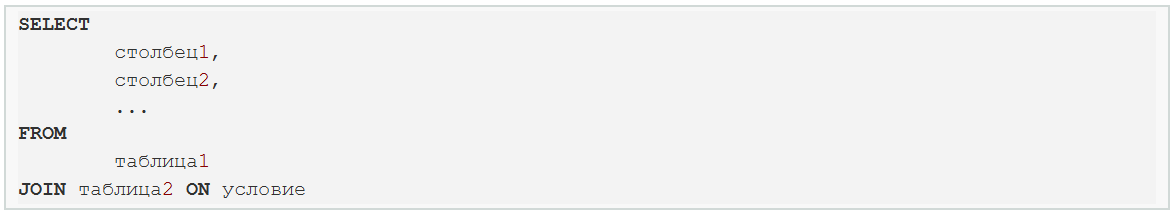

Порядок присоединения таблиц в данном случае не важен — результат будет одинаковым.

С помощью JOIN можно соединить и более двух таблиц.

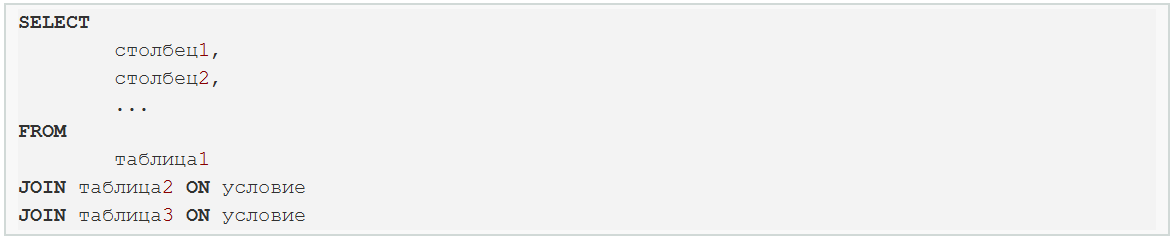

В таблицах, которые мы соединяем, могут быть одинаковые названия столбцов.

→ К примеру, столбец id есть и в таблице matches, и в таблице teams. Такой запрос не будет обработан.

In [ ]:
SELECT
    id
FROM 
sql.teams
    JOIN sql.matches ON home_team_api_id = api_id

В результате должно появиться сообщение об ошибке вроде такого: "... column id is ambiguous ...".

Что же делать в таком случае?

Можно указать, откуда мы хотим запросить данные, записав название таблицы перед столбцом через точку.

In [ ]:
SELECT
    teams.id
FROM 
    sql.teams
JOIN sql.matches ON home_team_api_id = api_id

Можно также выбрать и столбец из таблицы matches.

In [ ]:
SELECT
    matches.id
FROM 
    sql.teams
JOIN sql.matches on home_team_api_id = api_id

Зачастую названия таблиц слишком длинные, так что использовать их неудобно.

Упростить обращение к различным таблицам можно, присвоив им сокращённые названия — алиасы (от англ. alias).

Синтаксис для указания алиаса такой же, как и для названия столбца.

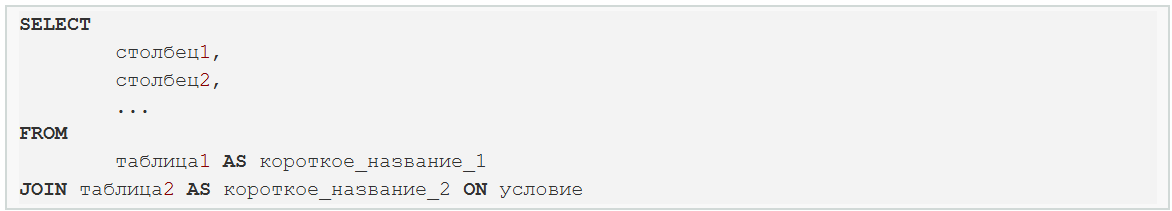

Название записывается без пробелов и операторов.

Если необходимо записать название, в котором используются пробелы ("table 1"), то алиас можно обернуть в кавычки.

Важно! Обращаться по такому алиасу придётся также с помощью кавычек.

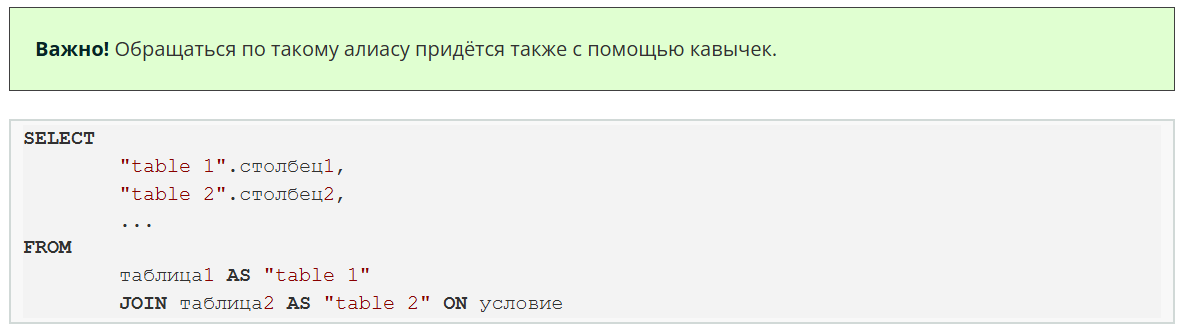

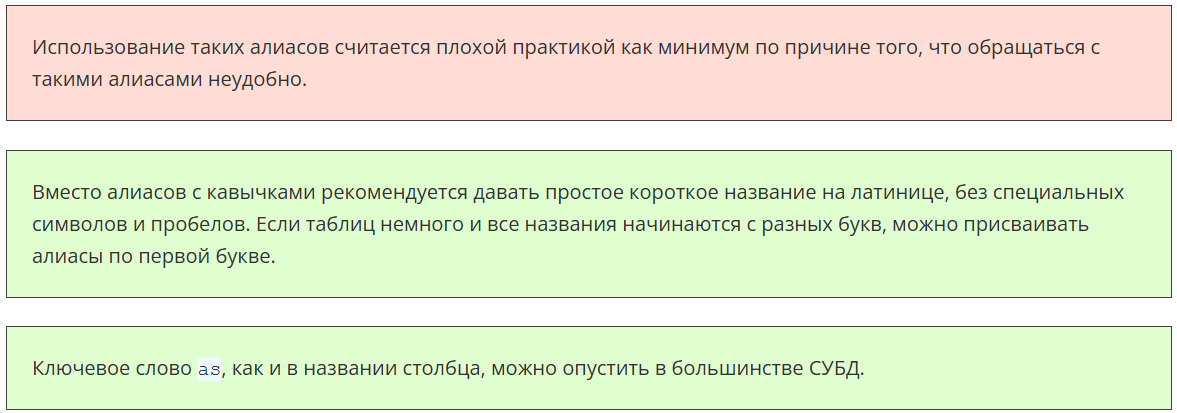

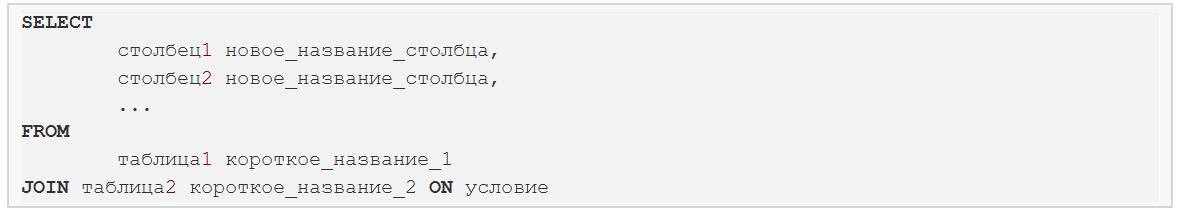

Давайте попробуем проделать то же самое для наших таблиц.

Напишите запрос, который выведет два столбца: id матча (match_id) и id домашней команды (team_id). Отсортируйте по id матча в порядке возрастания значений.

In [ ]:
SELECT 
    matches.id AS match_id,
    teams.id AS team_id
FROM 
    sql.matches
    join sql.teams on home_team_api_id = api_id
ORDER BY 1

In [ ]:
SELECT
    m.id match_id,
    t.id team_id
FROM
    sql.matches m
    join sql.teams t on t.api_id = m.home_team_api_id
ORDER BY 1


Кажется, теперь мы можем соединить таблицы между собой и создать своё табло со счётом матчей, как на спортивных сайтах!

Давайте с помощью запроса SQL получим таблицу, содержащую:

- название домашней команды;
- количество забитых домашней командой голов;
- количество забитых гостевой командой голов;
- название гостевой команды.

In [ ]:
SELECT
    h.long_name "домашняя команда",
    m.home_team_goals "голы домашней команды",
    m.away_team_goals "голы гостевой команды",
    a.long_name "гостевая команда" 
FROM
    sql.matches m
    JOIN sql.teams h ON m.home_team_api_id = h.api_id
    JOIN sql.teams a ON m.away_team_api_id = a.api_id

In [ ]:
SELECT
    h.long_name "домашняя команда", /*столбец long_name таблицы h*/
    m.home_team_goals "голы домашней команды", /*столбец home_team_goals таблицы m*/
    m.away_team_goals "голы гостевой команды", /*столбец away_team_goals таблицы m*/
    a.long_name "гостевая команда" /*столбец long_name таблицы a*/
FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams h ON m.home_team_api_id = h.api_id /*оператор соединения таблиц; таблица teams с алиасом h; условие: home_team_api_id таблицы m равен api_id таблицы h*/
    JOIN sql.teams a ON m.away_team_api_id = a.api_id /*оператор соединения таблиц; таблица teams с алиасом a; условие: away_team_api_id таблицы m равен api_id таблицы a*/

✍ А теперь попробуйте сделать это самостоятельно ↓

Напишите запрос, который выведет столбцы:

- id матча,
- короткое название домашней команды (home_short),
- короткое название гостевой команды (away_short).

Отсортируйте запрос по возрастанию id матча.

In [ ]:
SELECT
    m.id,
    h.short_name home_short,
    a.short_name away_short
FROM
    sql.matches m
    JOIN sql.teams h ON m.home_team_api_id = h.api_id
    JOIN sql.teams a ON m.away_team_api_id = a.api_id

# 4. Фильтрация и агрегатные функции

### Работа с объединёнными таблицами

✍ Соединять таблицы мы научились, теперь давайте научимся получать необходимые данные из нескольких таблиц ↓

Принцип построения запроса и порядок операторов такой же, как и с обычной таблицей.

Вспомним его:

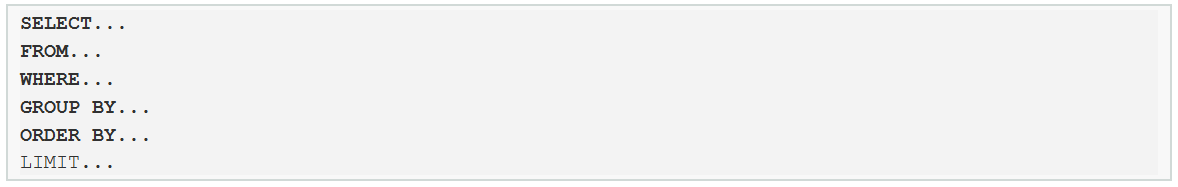

### Фильтрация данных

К соединённым таблицам применимы функции фильтрации данных.

Например, можно вывести id матчей, в которых команда Arsenal была гостевой.

In [ ]:
SELECT 
    m.id
FROM
    sql.teams t
    JOIN sql.matches m ON m.away_team_api_id = t.api_id
WHERE long_name = 'Arsenal'

In [ ]:
SELECT 
    m.id /*столбец id таблицы m*/
FROM
    sql.teams t /*таблица teams с алиасом t*/
    JOIN sql.matches m ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/
WHERE long_name = 'Arsenal' /*long_name таблицы teams имеет значение Arsenal*/

Принципиальное отличие фильтрации данных по соединённым таблицам от аналогичного действия по одиночным таблицам заключается в том, что, фильтруя записи одной таблицы, мы также будем фильтровать и записи другой таблицы, поскольку соединённые на уровне запроса таблицы по сути являются единой таблицей.

Например, результат запроса

In [ ]:
SELECT 
	m.id id_1,
	m.season,
	t.id id_2,
	t.long_name
FROM
	sql.teams t
JOIN sql.matches m ON m.away_team_api_id = t.api_id

можно разделить на две разные части

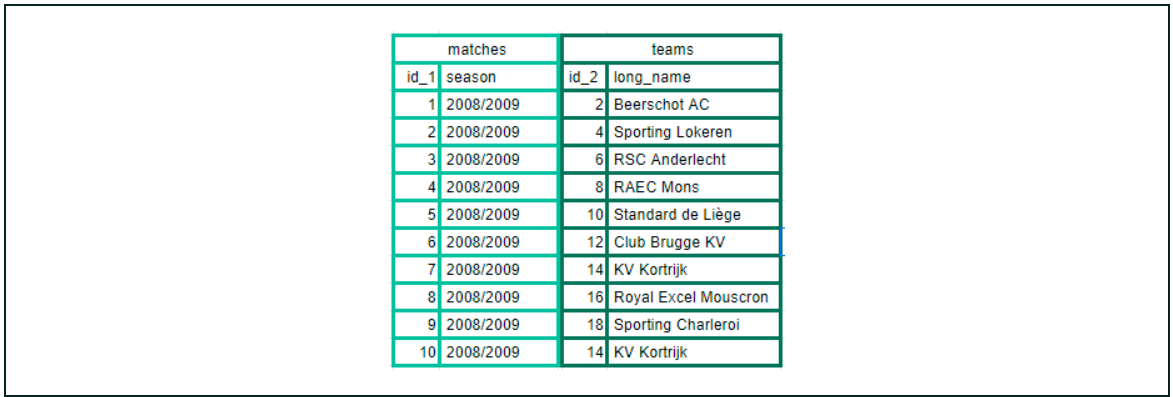

Одна часть — таблица matches с алиасом m, вторая — teams с алиасом t, но после соединения они являются одной таблицей.

Напишите запрос, который выведет полное название домашней команды (long_name), количество голов домашней команды (home_goal) и количество голов гостевой команды (away_goal) в матчах, где домашней командой были команды с коротким названием 'GEN'. Отсортируйте запрос по id матча в порядке возрастания.

In [ ]:
SELECT
    t.long_name,
    m.home_team_goals home_goal,
    m.away_team_goals away_goal,
    m.id
FROM    
    sql.matches m
    JOIN sql.teams t on t.api_id = m.home_team_api_id
WHERE
    t.short_name = 'GEN'
ORDER BY m.id

Также мы можем отфильтровать записи сразу по двум таблицам.

⛏
Попробуйте в Metabase!

Например, можно оставить только записи, в которых короткое название домашней команды GEN и матчи сезона 2008/2009.

In [ ]:
SELECT *
FROM    
    sql.matches m
    JOIN sql.teams t on t.api_id = m.home_team_api_id
WHERE
    t.short_name = 'GEN'
    AND m.season = '2008/2009'

Напишите запрос, чтобы вывести id матчей, короткое название домашней команды (home_short), короткое название гостевой команды (away_short) для матчей сезона 2011/2012, в которых участвовала команда с названием Liverpool. Отсортируйте по id матча в порядке возрастания.

In [ ]:
SELECT
    m.id,
    h.short_name AS home_short,
    a.short_name AS away_short
FROM
    sql.matches m
    JOIN sql.teams h ON m.home_team_api_id = h.api_id
    JOIN sql.teams a ON m.away_team_api_id = a.api_id
WHERE
    m.season = '2011/2012'
    AND ('Liverpool' IN (h.long_name, a.long_name))
ORDER BY m.id

### Агрегация данных

К соединённым таблицам также применимы любые агрегатные функции — самые важные функции для анализа данных.

⛏
Попробуйте в Metabase!

Например, мы можем вывести сумму голов матча, забитых командами, агрегированную по гостевым командам (совокупное количество голов в матче, забитых обеими командами, суммированное в разрезе гостевых команд).

In [ ]:
SELECT
    t.long_name,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals
FROM
    sql.matches m
    JOIN sql.teams t ON m.away_team_api_id = t.api_id 
GROUP BY t.id

In [ ]:
SELECT
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/
FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY t.id /*группировка по столбцу id таблицы t*/

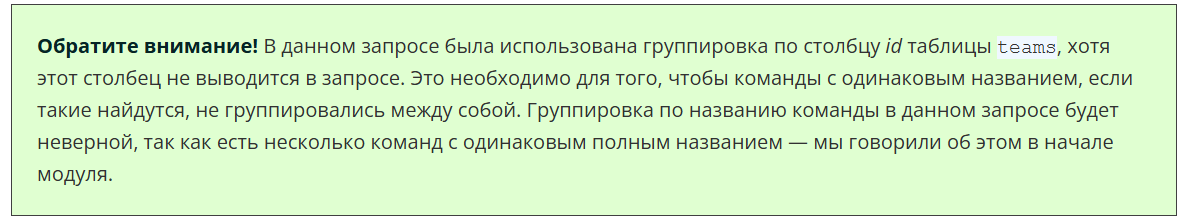

Также, применяя агрегатные функции к соединённым таблицам, обращайте внимание на указание алиасов (или таблиц) при группировке и указании столбцов агрегатных функций. В нашей соединённой таблице есть два столбца с названием id, и если бы мы сформировали запрос без указания таблицы, как указано ниже, то...

In [ ]:
SELECT
    t.long_name,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals
FROM 
    sql.matches m
    JOIN sql.teams t ON m.away_team_api_id = t.api_id
GROUP BY id

In [ ]:
SELECT
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) match_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/
FROM
    sql.matches m /*таблица matches с алиасом m*/
    JOIN sql.teams t ON m.away_team_api_id = t.api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY id /*группировка по столбцу id, но не указано, какой таблицы*/

система выдала бы уже знакомую нам ошибку: "... column "id" is ambiguous ...".

Мы можем использовать оператор HAVING для фильтрации сгруппированных данных.

Поставим задачу — вывести таблицу с суммарным количеством забитых голов в матчах по командам и сезонам для команд, в которых суммарное количество голов в матчах сезона больше 100.

Для начала посчитаем общее количество голов в матчах по сезонам.

In [ ]:
SELECT
    m.season,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals
FROM sql.matches m
GROUP BY m.season

In [ ]:
SELECT
    m.season, /*столбец season таблицы m*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/
FROM sql.matches m /*таблица matches с алиасом m*/
GROUP BY m.season /*группировка по столбцу season таблицы m*/

Затем добавим таблицу с командами, группировку по командам и условие фильтрации.

In [ ]:
SELECT
    m.season,
    t.long_name,
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals
FROM sql.matches m
JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
GROUP BY m.season, t.id
HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100

In [ ]:
SELECT
    m.season, /*столбец season таблицы m*/
    t.long_name, /*столбец long_name таблицы t*/
    SUM(m.home_team_goals) + SUM(m.away_team_goals) total_goals /*функция суммирования; столбец home_team_goals таблицы m; функция суммирования; столбец away_team_goals таблицы m; новое название столбца*/
FROM sql.matches m /*таблица matches с алиасом m*/
JOIN sql.teams t ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения таблиц; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY m.season, t.id /*группировка по столбцам season таблицы m и id таблицы t*/
HAVING SUM(m.home_team_goals) + SUM(m.away_team_goals) > 100 /*оператор фильтрации сгруппированных данных; функция суммирования; home_team_goals таблицы m; функция суммирования; away_team_goals таблицы m; больше 100*/

Напишите запрос, с помощью которого можно вывести список полных названий команд, сыгравших в гостях 150 и более матчей. Отсортируйте список по названию команды.

In [ ]:
SELECT
    t.long_name
FROM
    sql.teams t
    JOIN sql.matches m ON m.away_team_api_id = t.api_id
GROUP BY t.id
HAVING COUNT(m.id) >= 150
ORDER BY t.long_name

# 5. Способы соединения таблиц

✍ В прошлых юнитах для соединения таблиц мы использовали один оператор — JOIN. В действительности же он не один: существует несколько различных видов соединений (join’ов) — давайте посмотрим, какие ↓

### Операторы

✍ В прошлых юнитах для соединения таблиц мы использовали один оператор — JOIN. В действительности же он не один: существует несколько различных видов соединений (join’ов) — давайте посмотрим, какие ↓

### INNER JOIN

INNER JOIN — это тот же JOIN (слово inner в операторе можно опустить).

Принцип работы этого оператора визуализирует изображение ниже.

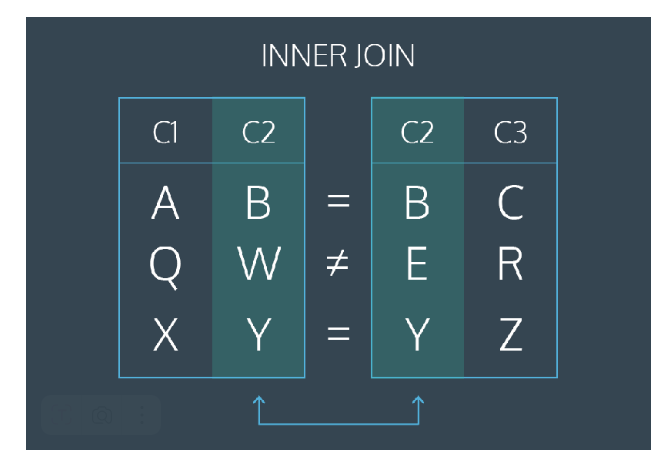

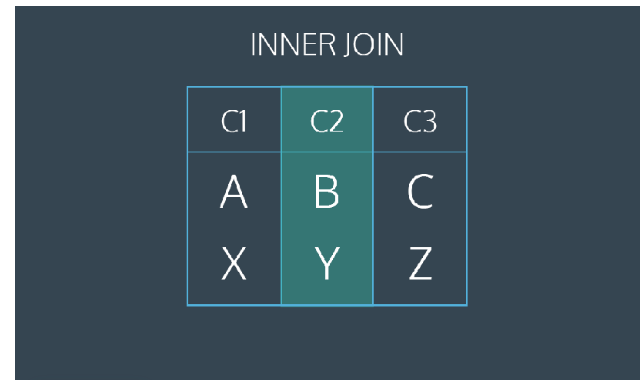

Для INNER JOIN работает следующее правило: присоединяются только те строки таблиц, которые удовлетворяют условию соединения. Если в любой из соединяемых таблиц находятся такие строки, которые не удовлетворяют заявленному условию, — они отбрасываются.

Рассмотрим на примере нашего датасета. 

В таблице teams есть данные о 299 различных командах — можем проверить это с помощью запроса.

In [ ]:
SELECT 
COUNT(DISTINCT id)
FROM sql.teams

или

In [ ]:
SELECT 
COUNT(DISTINCT api_id)
FROM sql.teams

Теперь добавим к teams таблицу с матчами.

In [ ]:
SELECT 
COUNT(DISTINCT t.id) 
FROM 
sql.teams t
JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id

In [ ]:
SELECT 
COUNT(DISTINCT t.id) /*оператор подсчёта строк; оператор исключения повторяющихся строк; столбец id*/
FROM 
sql.teams t /*таблица teams с алиасом t*/
JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения inner JOIN; таблица teams с алиасом t; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/

И в таблице останется уже не 299 команд, а только 292.

Почему?

Дело в том, что таблица sql.matches по какой-то причине не содержит информацию о командах Lierse SK, KVC Westerlo, KAS Eupen, Club Brugge KV, KV Oostende, RSC Anderlecht и Hull City, зато они есть в таблице sql.teams. Возможно, эти команды не участвовали ни в одном матче или записи по этим матчам были удалены.

### LEFT OUTER JOIN и RIGHT OUTER JOIN

Также существуют схожие друг с другом типы соединения — LEFT JOIN и RIGHT JOIN (слово outer в операторе можно опустить).

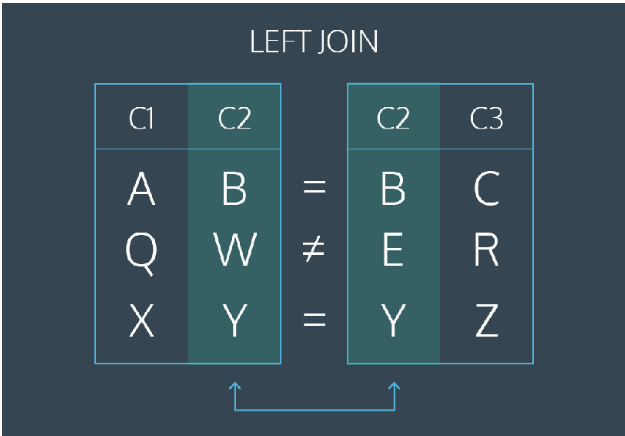

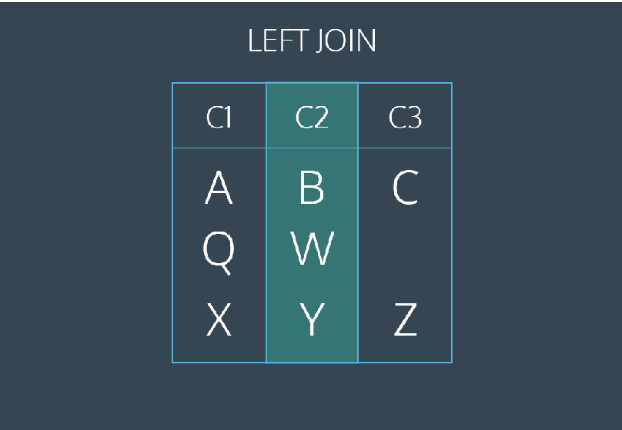

Для LEFT JOIN работает следующее правило: из левой (относительно оператора) таблицы сохраняются все строки, а из правой добавляются только те, которые соответствуют условию соединения. Если в правой таблице не находится соответствия, то значения строк второй таблицы будут иметь значение NULL.

LEFT JOIN может быть полезен, когда соответствующих записей во второй таблице может не быть, но важно сохранить записи из первой таблицы.

Почему соответствий может не быть?

Причины могут быть разные, назовём две основные:

Различная бизнес-логика таблиц.

Пример: в интернет-магазине почти всегда можно оформить заказ с промокодом. Вполне вероятно, что информация о промокодах хранится в отдельной таблице, но при этом не для каждого заказа будет существовать промокод, поскольку покупку можно оформить и без него.

Разное время обновления таблиц.

Пример: клиент зарегистрировался на сайте интернет-магазина и оформил заказ. Данные о регистрации клиентов могут обновляться в базе данных раз в неделю, а о заказах — раз в сутки.

→ Поставим следующую задачу: вывести полные названия команд, данных по которым нет в таблице matches.

Для начала посмотрим на результат запроса после соединения.

In [ ]:
SELECT
    t.long_name,
    m.id
FROM sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
ORDER BY m.id DESC

In [ ]:
SELECT
    t.long_name, /*столбец long_name таблицы t*/
    m.id /*столбец id таблицы m*/
FROM sql.teams t /*таблица teams с алиасом t*/
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/
ORDER BY m.id DESC /*сортировка по id таблицы m по убыванию, чтобы увидеть строки со значением null*/

Вывод: в таблице teams сохранились все записи, а в таблице matches есть пустые строки.

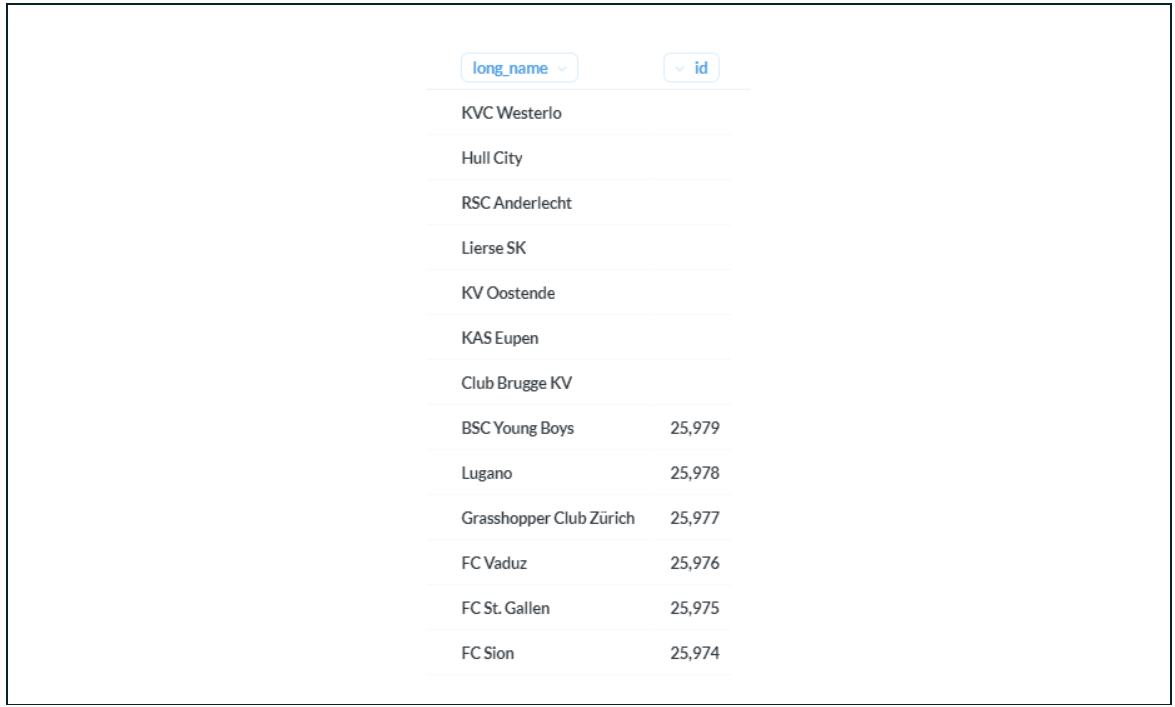

Теперь, чтобы выбрать такие команды, которые не принимали участия в матчах, достаточно добавить условие where m.id is null (или любое другое поле таблицы matches).

In [ ]:
SELECT
    t.long_name
FROM 
    sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE m.id IS NULL

In [ ]:
SELECT
    t.long_name /*столбец long_name таблицы t*/
FROM 
    sql.teams t /*таблица teams с алиасом t*/
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/
WHERE m.id IS NULL /*условие: столбец id таблицы m имеет значение null*/

Обратите внимание! Если мы добавим какой-либо фильтр по отличному от NULL значению для таблицы matches, то LEFT JOIN превратится в INNER JOIN, поскольку для второй таблицы станет необходимым присутствие такого (NOT NULL) значения в строке.

In [ ]:
SELECT
    t.long_name FROM sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE
    m.season = '2008/2009'
AND t.long_name = 'KAS Eupen'

In [ ]:
SELECT
    t.long_name /*столбец long_name таблицы t*/
FROM sql.teams t /*таблица teams с алиасом t*/
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id /*оператор соединения left JOIN; таблица matches с алиасом m; условие: home_team_api_id таблицы m равен api_id таблицы t или away_team_api_id таблицы m равен api_id таблицы t*/
WHERE
    m.season = '2008/2009'  /*условие: столбец season таблицы m имеет значение 2008/2009*/
AND t.long_name = 'KAS Eupen' /*условие: столбец long_name таблицы t имеет значение KAS Eupen*/

В ответе Metabase получим No results!, так как вместе с фильтром m.season = '2008/2009' исчезли все строки, значения которых NULL.

Используя LEFT JOIN, выведите список уникальных названий команд, содержащихся в таблице matches. Отсортируйте список в алфавитном порядке.

In [ ]:
SELECT DISTINCT
    t.long_name
FROM
    sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
WHERE
    m.id IS NOT NULL
ORDER BY t.long_name

С LEFT JOIN также работают агрегатные функции, что позволяет не потерять значения из левой таблицы. Например, мы можем вывести сумму голов команд по гостевым матчам.

In [ ]:
SELECT
    t.long_name,
    SUM(m.away_team_goals) total_goals
FROM   
    sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id
GROUP BY t.id
ORDER BY 2 DESC

In [ ]:
SELECT
    t.long_name,
    SUM(m.away_team_goals) total_goals
FROM 
    sql.teams t /*таблица teams с алиасом t*/
LEFT JOIN sql.matches m ON t.api_id = m.away_team_api_id /*оператор соединения LEFT JOIN; таблица matches с алиасом m; условие: away_team_api_id таблицы m равен api_id таблицы t*/
GROUP BY t.id /*группировка по столбцу id таблицы t*/
ORDER BY 2 DESC /*сортировка по столбцу total_goals по убыванию, чтобы увидеть строки со значением null*/

Обратите внимание! При применении функций SUM, MIN, MAX, AVG к полям со значением NULL в результате получится NULL, а не 0. А при использовании функции COUNT, наоборот, получится 0.

Используя LEFT JOIN, напишите запрос, который выведет полное название команды (long_name), количество матчей, в которых участвовала команда, — домашних и гостевых (matches_cnt). Отсортируйте по количеству матчей в порядке возрастания, затем — по названию команды в алфавитном порядке.

In [ ]:
SELECT
    t.long_name,
    COUNT(m.id) AS matches_cnt
FROM
    sql.teams t
LEFT JOIN sql.matches m ON t.api_id = m.home_team_api_id OR t.api_id = m.away_team_api_id
GROUP BY t.id
ORDER BY matches_cnt ASC, t.long_name ASC

При использовании RIGHT JOIN сохраняется та же логика, что и для LEFT JOIN, только за основу берётся правая таблица.

Чтобы из LEFT JOIN получить RIGHT JOIN, нужно просто поменять порядок соединения таблиц.

Вообще, применение RIGHT JOIN считается плохим тоном, так как язык SQL читается и пишется слева направо, а такой оператор усложняет чтение запросов.

### FULL OUTER JOIN

Оператор FULL OUTER JOIN объединяет в себе LEFT и RIGHT JOIN и позволяет сохранить кортежи обеих таблиц. Даже если не будет соответствий, мы сохраним все записи из обеих таблиц.

FULL OUTER JOIN может быть полезен в ситуациях, когда схема данных недостаточно нормализована и не хватает таблиц-справочников.

Пример: в базе данных интернет-магазина есть две таблицы — с зарегистрированными пользователями и пользователями, оформившими заказ. При этом оформить заказ можно без регистрации, а зарегистрироваться — без оформления заказа.

Предположим, что вам необходимо получить полный список пользователей — и оформивших заказ, и зарегистрированных, — но в базе данных этой объединённой таблицы нет. В данном случае можно использовать FULL OUTER JOIN для получения полного списка, соединив таким образом таблицы c заказами и регистрациями по id пользователя.

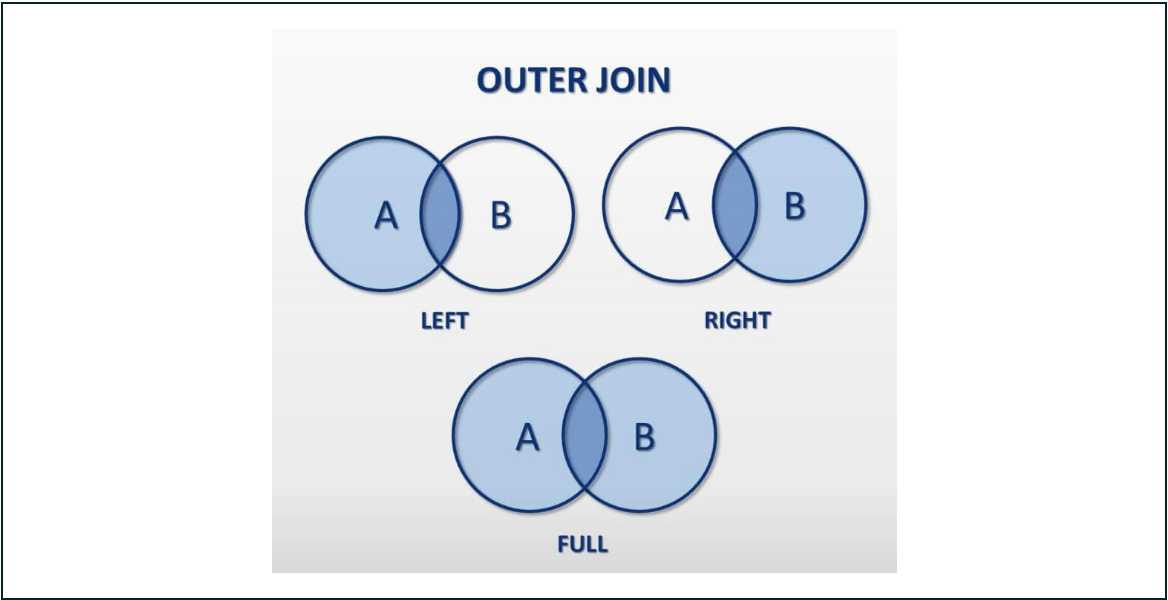

Синтаксис FULL OUTER JOIN аналогичен другим JOIN.

In [ ]:
SELECT 
…
FROM
	table1
FULL OUTER JOIN table2 ON условие

### Cross Join

На самом деле с этим оператором соединения таблиц вы познакомились в самом начале текущего модуля.

CROSS JOIN соединяет таблицы так, что каждая запись в первой таблице присоединяется к каждой записи во второй таблице, иначе говоря, даёт декартово произведение.

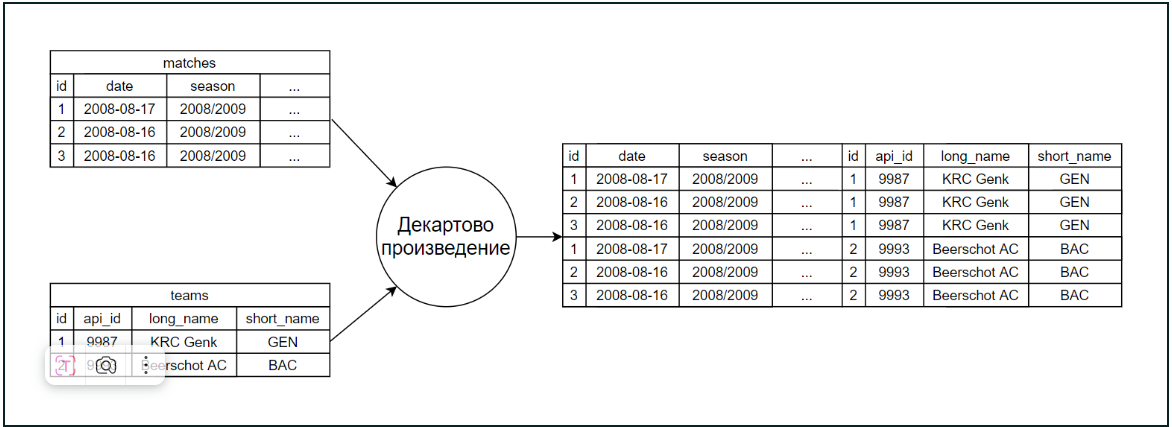

В начале модуля вы использовали этот оператор, записывая таблицы через запятую.

In [ ]:
SELECT *
FROM
    sql.teams,
    sql.matches

In [ ]:
SELECT * /*выбор всех полей*/
FROM
    sql.teams, /*таблица teams*/
    sql.matches /*таблица matches*/

Этот же запрос можно записать с использованием CROSS JOIN.

In [ ]:
SELECT *
FROM
    sql.teams
    CROSS JOIN sql.matches

In [ ]:
SELECT * /*выбор всех полей*/
FROM
    sql.teams /*таблица teams*/
    CROSS JOIN sql.matches /*таблица matches*/

Обратите внимание! Условие для CROSS JOIN, в отличие от других операторов, не требуется.

Также этот запрос можно записать с помощью INNER JOIN с условием on true — результат будет тот же.

In [ ]:
SELECT *
FROM
    sql.teams
    JOIN sql.matches ON TRUE

In [ ]:
SELECT * /*выбор всех полей*/
FROM
    sql.teams /*таблица teams*/
    JOIN sql.matches ON TRUE /*оператор соединения INNER JOIN; таблица matches; условие: для всех случаев*/

CROSS JOIN может быть полезен, когда необходимо создать таблицу фактов.

Например, с помощью такого запроса мы можем получить все возможные комбинации полных названий команд в матчах.

In [ ]:
SELECT
    DISTINCT
    t1.long_name home_team, 
    t2.long_name away_team
FROM
    sql.teams t1
    CROSS JOIN sql.teams t2

In [ ]:
SELECT
    DISTINCT /*оператор исключения повторяющихся строк*/
    t1.long_name home_team, /*столбец long_name таблицы t1; новое название*/
    t2.long_name away_team /*столбец long_name таблицы t2; новое название*/
FROM
    sql.teams t1 /*таблица teams с алиасом t1*/
    CROSS JOIN sql.teams t2 /*оператор соединения CROSS JOIN; таблица teams с алиасом t2*/

Напишите запрос, который выведет все возможные уникальные комбинации коротких названий домашней команды (home_team) и коротких названий гостевой команды (away_team). Команда не может сама с собой играть, то есть быть и домашней, и одновременно гостевой (в одном и том же матче). Отсортируйте запрос по первому и второму столбцам.

In [ ]:
SELECT DISTINCT
    t1.short_name AS home_team,
    t2.short_name AS away_team
FROM
    sql.teams t1
    CROSS JOIN sql.teams t2
WHERE
    t1.id <> t2.id
ORDER BY home_team, away_team

### NATURAL JOIN

Ключевое слово natural в начале оператора JOIN позволяет не указывать условие соединения таблиц — для соединения будут использованы столбцы с одинаковым названием из этих таблиц.

NATURAL JOIN можно использовать с любыми видами соединений, которые требуют условия соединения:

→ NATURAL INNER JOIN (возможна запись NATURAL JOIN);

→ NATURAL LEFT JOIN;

→ NATURAL RIGHT JOIN;

→ NATURAL FULL OUTER JOIN.

При использовании NATURAL JOIN прежде всего стоит обратить внимание на ключи таблиц. Для наших таблиц teams и matches этот вид соединения не подойдёт, так как общим для обеих таблиц является столбец id, но таблицы соединяются по другим столбцам.

Когда у таблиц есть несколько столбцов с одинаковыми именами, при NATURAL JOIN условие соединения будет применено на все столбцы с одинаковыми именами.

То есть для таблиц table1 и table2

table1: id, name, ...

table2: id, name, ...

запрос

In [ ]:
SELECT 
…
FROM          table1 NATURAL JOIN table2

будет равнозначен запросу

In [ ]:
SELECT
…
FROM          table1 t1
INNER JOIN table2 t2 ON t1.id = t2.id AND t1.name = t2.name

Общая логика построения запроса с JOIN

При построении запроса с несколькими JOIN старайтесь идти слева направо. Сначала выберите таблицу, которая является центральной в соответствии с поставленной задачей, вопросом. Затем добавляйте таблицы поэтапно в зависимости от бизнес-логики запроса.

Например, для ответа на вопрос: «Какая команда сыграла больше всех матчей в сезоне 2010/2011?» в качестве центральной лучше выбрать таблицу с командами.

А для ответа на вопрос: «В каком сезоне участвовало больше всего команд?» — таблицу с матчами.

Стоит отметить, что из рассмотренных видов соединений чаще всего используются INNER JOIN и LEFT JOIN. Другие операторы используются реже, но стоит помнить об их существовании при решении нестандартных задач.

### Виды Join'ов

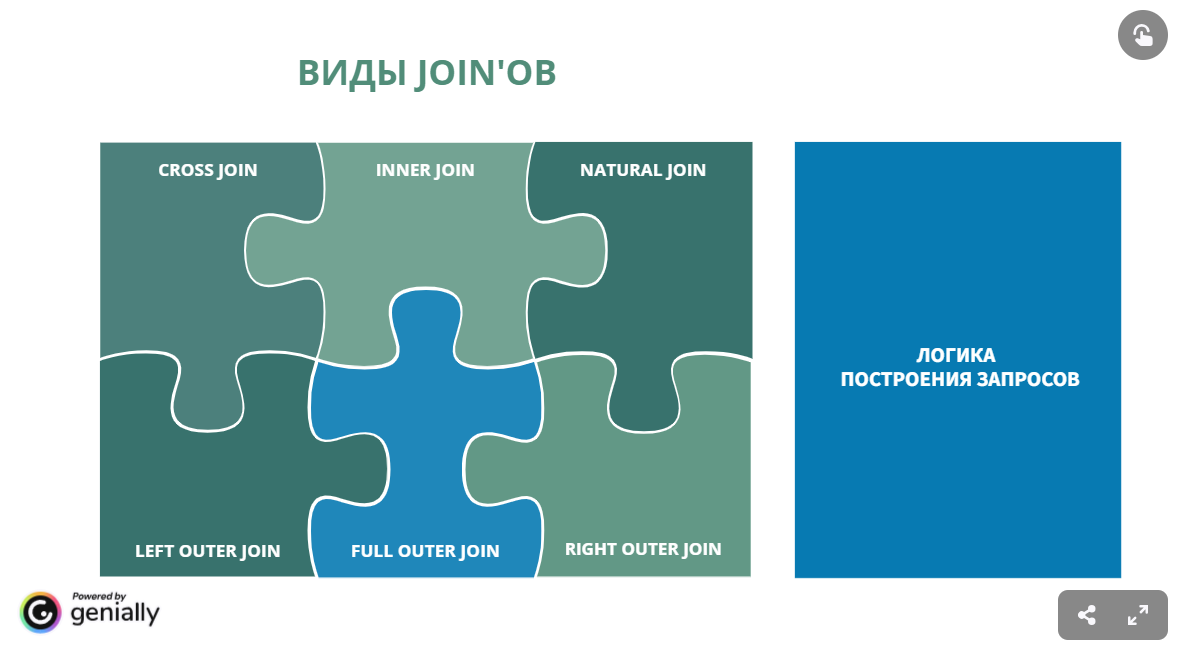

### 6. Итоги. Закрепление знаний

✍ В этом модуле вы познакомились с разными способами вертикального соединения таблиц.

Теперь вы умеете:

соединять таблицы по ключу;
соединять таблицы с помощью оператора JOIN;
использовать разные виды JOIN;
применять агрегации к объединённым таблицам и фильтровать вывод.

Теперь давайте закрепим полученные знания ↓

Вам предстоит выполнить пять заданий на написание SQL-запросов по определённым условиям.

Если какую-то задачу не получается выполнить с первого раза — не отчаивайтесь. Соединение таблиц — одна из самых сложных тем для освоения и эффективного использования языка SQL.

Если при выполнении заданий возникли трудности, попробуйте вернуться к материалам и посмотреть примеры запросов для разных задач.

Напишите запрос, который выведет список уникальных полных названий команд (long_name), игравших в гостях в матчах сезона 2012/2013. Отсортируйте список в алфавитном порядке.

In [ ]:
SELECT DISTINCT
    t.long_name
FROM
    sql.teams t
JOIN sql.matches m ON t.api_id = m.away_team_api_id
WHERE
    m.season = '2012/2013'
ORDER BY t.long_name

Напишите запрос, который выведет полное название команды (long_name) и общее количество матчей (matches_cnt), сыгранных командой Inter в домашних матчах.

In [ ]:
SELECT
    t.long_name,
    COUNT(m.id) AS matches_cnt
FROM
    sql.teams t
JOIN sql.matches m ON t.api_id = m.home_team_api_id
WHERE
    t.long_name = 'Inter'
GROUP BY t.long_name

Напишите запрос, который выведет топ-10 команд (long_name) по суммарному количеству забитых голов в гостевых матчах. Во втором столбце запроса выведите суммарное количество голов в гостевых матчах (total_goals).

In [ ]:
SELECT
    t.long_name,
    SUM(m.away_team_goals) AS total_goals
FROM
    sql.teams t
JOIN sql.matches m ON t.api_id = m.away_team_api_id
GROUP BY t.long_name
ORDER BY total_goals DESC
LIMIT 10

Выведите количество матчей между командами Real Madrid CF и FC Barcelona. В поле ниже введите запрос, с помощью которого вы решили задание.

In [ ]:
SELECT
    COUNT(*) AS matches_cnt
FROM
    sql.matches m
JOIN sql.teams t1 ON m.home_team_api_id = t1.api_id
JOIN sql.teams t2 ON m.away_team_api_id = t2.api_id
WHERE
    (t1.long_name = 'Real Madrid CF' AND t2.long_name = 'FC Barcelona')
    OR
    (t1.long_name = 'FC Barcelona' AND t2.long_name = 'Real Madrid CF')

Напишите запрос, который выведет название команды (long_name), сезон (season) и суммарное количество забитых голов в домашних матчах (total_goals). Оставьте только те строки, в которых суммарное количество голов менее десяти. Отсортируйте запрос по названию команды, а затем — по сезону.

In [ ]:
SELECT
    t.long_name,
    m.season,
    SUM(m.home_team_goals) AS total_goals
FROM
    sql.teams t
JOIN sql.matches m ON t.api_id = m.home_team_api_id
GROUP BY t.long_name, m.season
HAVING SUM(m.home_team_goals) < 10
ORDER BY t.long_name, m.season

### Отлично, вы справились!

Однако мы предлагаем немного задержаться в этом модуле.

Объединение таблиц — одна из ключевых тем. Знания в этой области нередко проверяют на собеседованиях, поэтому уделите отработке навыков особое внимание. Ниже вы найдёте несколько наиболее распространённых вопросов по объединению таблиц.

Важно! Это задания на самопроверку, они необязательные и мы не будем оценивать качество их решения. Однако настоятельно рекомендуем вам попробовать выполнить их самостоятельно, прежде чем открывать ответ.

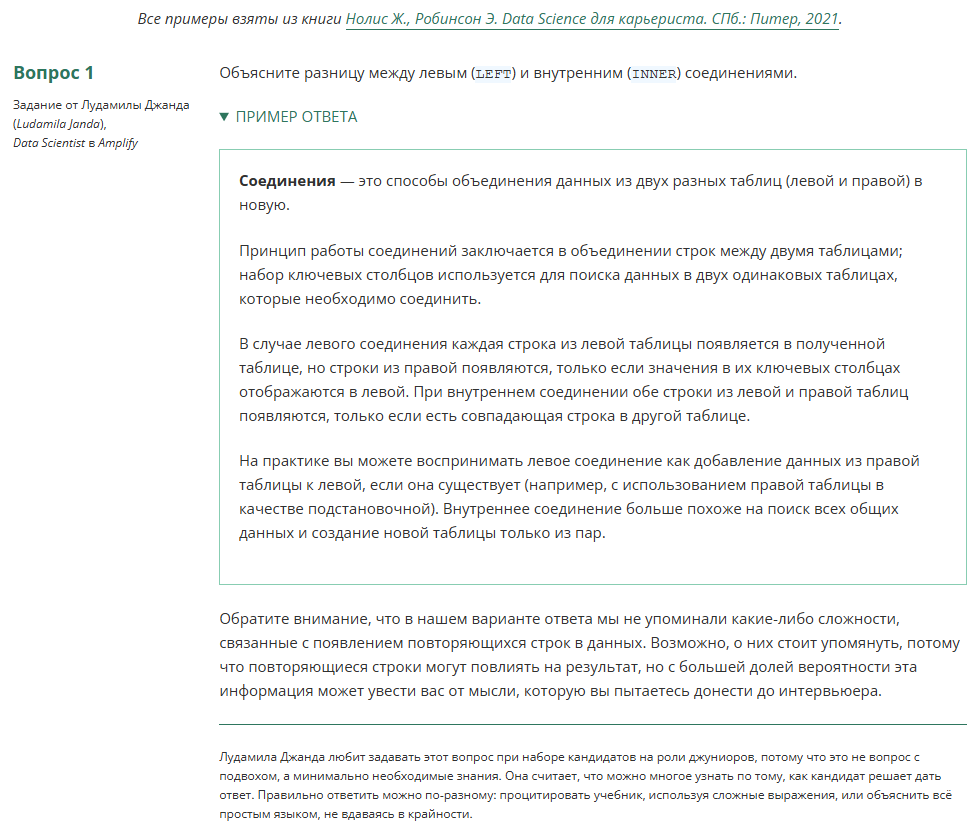

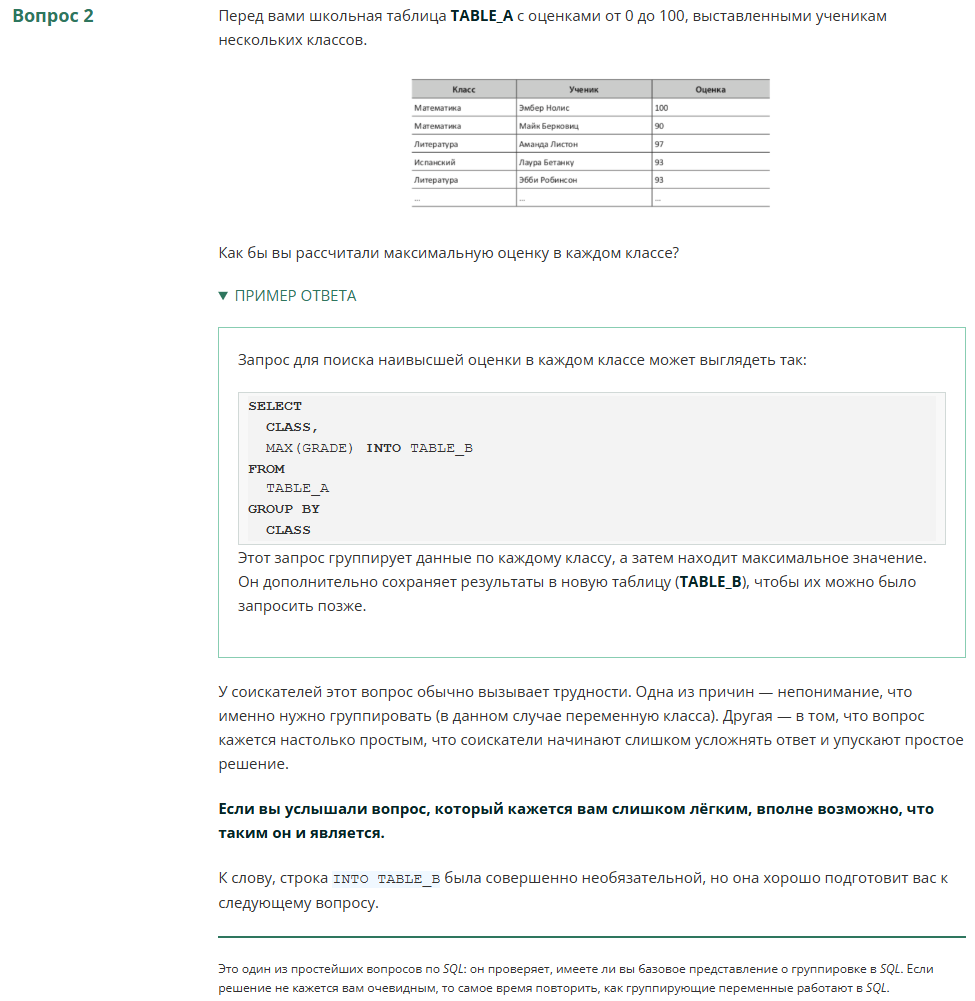

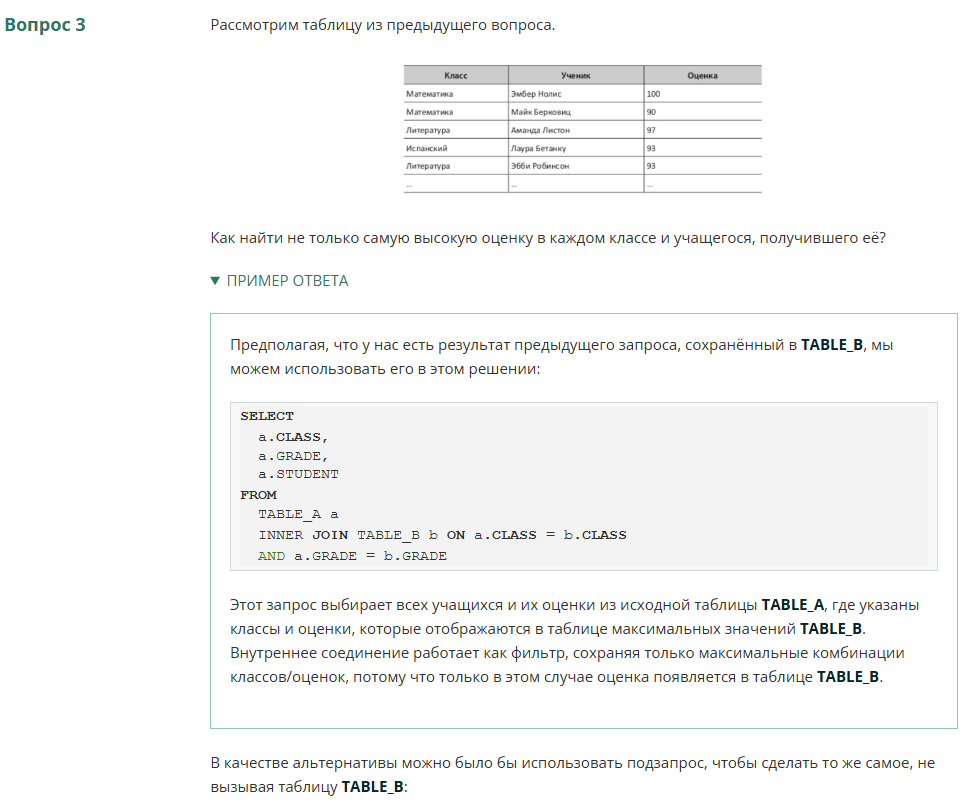

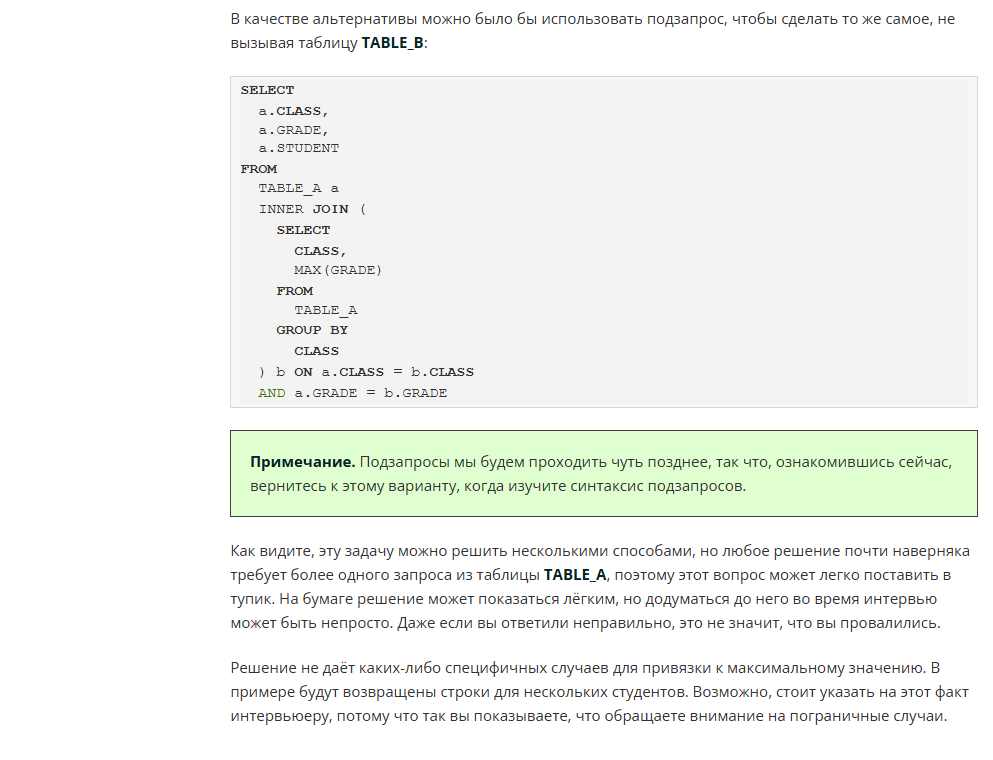